In [97]:
# Import libraries

import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [11]:
try:
    heart_dis_data = pd.read_excel('C:/Users/61450/Desktop/refonte folder/heart disease prediction/heart.xlsx')
except FileNotFoundError as e:
    print(f"Error: {e}")

In [13]:
try:
    if heart_dis_data.empty:
        print('data frame is empty')
    else:
        print(heart_dis_data.isnull().sum())
except attributeerror as e:
    print(f"error:{e}")
    print("the data frame does not exist or is malformed")
    heart_dis_data = pd.DataFrame()

age                                                0
sex                                                0
Chest pain type                                    0
Blood pressure                                     0
cholestrol                                         0
fasting blood sugar                                0
resting electrocardiogarphic results               0
maximum heart rate achieved                        0
exercise induced angina                            0
oldpeak                                            0
slope                                              0
number of major vessels coloured by fluoroscopy    0
thalassemia                                        0
target                                             0
dtype: int64


In [15]:
heart_dis_data.head()

,age,sex,Chest pain type,Blood pressure,cholestrol,fasting blood sugar,resting electrocardiogarphic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope,number of major vessels coloured by fluoroscopy,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
heart_dis_data.dtypes

age                                                  int64
sex                                                  int64
Chest pain type                                      int64
Blood pressure                                       int64
cholestrol                                           int64
fasting blood sugar                                  int64
resting electrocardiogarphic results                 int64
maximum heart rate achieved                          int64
exercise induced angina                              int64
oldpeak                                            float64
slope                                                int64
number of major vessels coloured by fluoroscopy      int64
thalassemia                                          int64
target                                               int64
dtype: object

In [19]:
heart_features = heart_dis_data[['sex','Chest pain type', 'fasting blood sugar','resting electrocardiogarphic results','exercise induced angina',
'slope','thalassemia','target']].astype('category')

heart_dis_data[['sex','Chest pain type', 'fasting blood sugar','resting electrocardiogarphic results','exercise induced angina',
'slope','thalassemia','target']]  = heart_features

heart_dis_data.dtypes

age                                                   int64
sex                                                category
Chest pain type                                    category
Blood pressure                                        int64
cholestrol                                            int64
fasting blood sugar                                category
resting electrocardiogarphic results               category
maximum heart rate achieved                           int64
exercise induced angina                            category
oldpeak                                             float64
slope                                              category
number of major vessels coloured by fluoroscopy       int64
thalassemia                                        category
target                                             category
dtype: object

In [21]:
print(heart_dis_data['sex'].value_counts())
print(heart_dis_data['Chest pain type'].value_counts())
print(heart_dis_data['fasting blood sugar'].value_counts())
print(heart_dis_data['resting electrocardiogarphic results'].value_counts())
print(heart_dis_data['exercise induced angina'].value_counts())
print(heart_dis_data['slope'].value_counts())
print(heart_dis_data['number of major vessels coloured by fluoroscopy'].value_counts()) 
print(heart_dis_data['thalassemia'].value_counts())
print(heart_dis_data['target'].value_counts())

sex
1    207
0     96
Name: count, dtype: int64
Chest pain type
0    143
2     87
1     50
3     23
Name: count, dtype: int64
fasting blood sugar
0    258
1     45
Name: count, dtype: int64
resting electrocardiogarphic results
1    152
0    147
2      4
Name: count, dtype: int64
exercise induced angina
0    204
1     99
Name: count, dtype: int64
slope
2    142
1    140
0     21
Name: count, dtype: int64
number of major vessels coloured by fluoroscopy
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
thalassemia
2    166
3    117
1     18
0      2
Name: count, dtype: int64
target
1    165
0    138
Name: count, dtype: int64


In [23]:
# Map the classes of categorical names into their distinctive class names

In [25]:
heart_dis_data['Chest pain type'] = heart_dis_data['Chest pain type'].map({0: 'typical angina', 1: 'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})
heart_dis_data['resting electrocardiogarphic results'] = heart_dis_data['resting electrocardiogarphic results'].map({1: 'ST-T wave abnormality', 0: 'normal', 2:'left ventricular hypertrophy'})
heart_dis_data['slope'] = heart_dis_data['slope'].map({1: 'flat', 0: 'upsloping', 2: 'downsloping'})
heart_dis_data['thalassemia'] = heart_dis_data['thalassemia'].map({1: 'fixed defect', 0: 'normal', 2: 'reversible defect', 3: 'not described'})

In [27]:
# One Hot encoding of categorical variables

In [29]:
one_hot = preprocessing.OneHotEncoder(sparse_output=False)

chest_pain = one_hot.fit_transform(np.array(heart_dis_data['Chest pain type']).reshape(len(heart_dis_data['Chest pain type']),1))
elec_res = one_hot.fit_transform(np.array(heart_dis_data['resting electrocardiogarphic results']).reshape(len(heart_dis_data['resting electrocardiogarphic results']),1))
slope_dt = one_hot.fit_transform(np.array(heart_dis_data['slope']).reshape(len(heart_dis_data['slope']),1))
thal_dt = one_hot.fit_transform(np.array(heart_dis_data['thalassemia']).reshape(len(heart_dis_data['thalassemia']),1))

In [31]:
ch_pain = pd.DataFrame(chest_pain, columns=sorted(list(heart_dis_data['Chest pain type'].unique())))
elec_res_data = pd.DataFrame(elec_res, columns=sorted(list(heart_dis_data['resting electrocardiogarphic results'].unique())))
slope_data = pd.DataFrame(slope_dt, columns=sorted(list(heart_dis_data['slope'].unique())))
thal_data = pd.DataFrame(thal_dt, columns=sorted(list(heart_dis_data['thalassemia'].unique())))

In [33]:
heart_data = pd.concat([heart_dis_data, ch_pain, elec_res_data,  slope_data, thal_data], axis=1)
heart_data = heart_data.drop(['Chest pain type','resting electrocardiogarphic results','slope','thalassemia'],axis=1)
heart_data = heart_data.rename(columns={'sex':'sex (male = 1)', 'fasting blood sugar':'blood sugar (high = 1)'})

In [35]:
heart_data.head()

,age,sex (male = 1),Blood pressure,cholestrol,blood sugar (high = 1),maximum heart rate achieved,exercise induced angina,oldpeak,number of major vessels coloured by fluoroscopy,target,...,ST-T wave abnormality,left ventricular hypertrophy,normal,downsloping,flat,upsloping,fixed defect,normal,not described,reversible defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,37,1,130,250,0,187,0,3.5,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,41,0,130,204,0,172,0,1.4,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,56,1,120,236,0,178,0,0.8,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,57,0,120,354,0,163,1,0.6,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# Exploratory Data analysis

Text(0, 0.5, 'Distribution of classes in target variable')

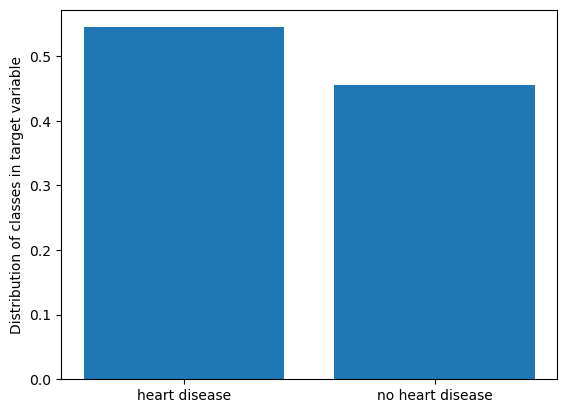

In [39]:
y = heart_data['target'].value_counts()/len(heart_data['target'])
x = ['heart disease','no heart disease']
plt.bar(x,y)
plt.ylabel('Distribution of classes in target variable')

In [41]:
# Descriptive statistics of quantitative variables

heart_data[['age','Blood pressure','cholestrol','maximum heart rate achieved','oldpeak','number of major vessels coloured by fluoroscopy']].describe()

,age,Blood pressure,cholestrol,maximum heart rate achieved,oldpeak,number of major vessels coloured by fluoroscopy
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


Text(0.5, 1.0, 'number of major vessels distribution')

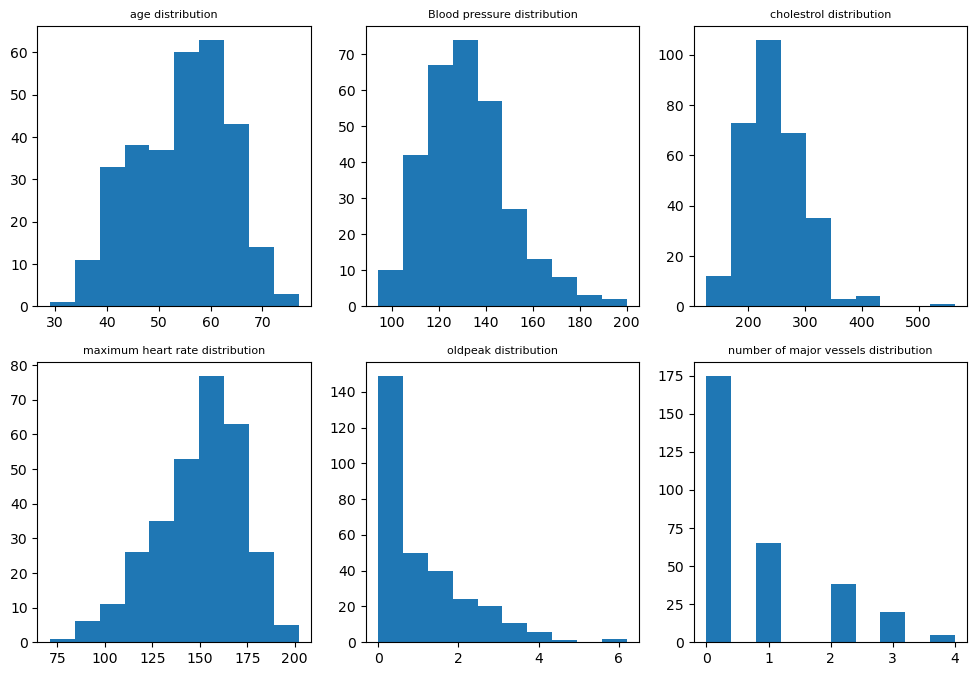

In [43]:
#Distribution of quantitaive variables

fig, axis = plt.subplots(2,3, figsize=(12,8))

axis[0,0].hist(heart_data['age'])
axis[0,0].set_title('age distribution', size=8)

axis[0,1].hist(heart_data['Blood pressure'])
axis[0,1].set_title('Blood pressure distribution', size=8)

axis[0,2].hist(heart_data['cholestrol'])
axis[0,2].set_title('cholestrol distribution', size=8)

axis[1,0].hist(heart_data['maximum heart rate achieved'])
axis[1,0].set_title('maximum heart rate distribution', size=8)

axis[1,1].hist(heart_data['oldpeak'])
axis[1,1].set_title('oldpeak distribution', size=8)

axis[1,2].hist(heart_data['number of major vessels coloured by fluoroscopy'])
axis[1,2].set_title('number of major vessels distribution', size=8)

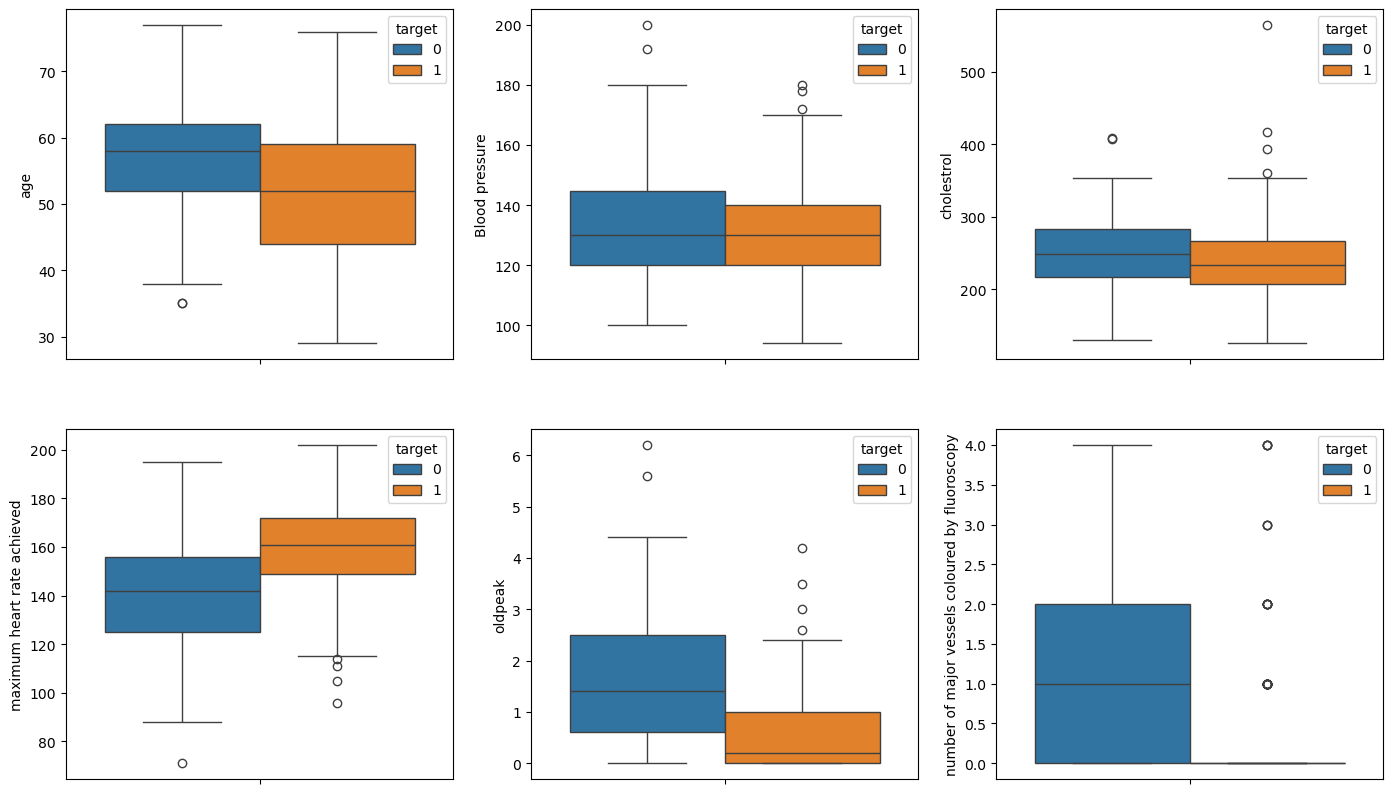

In [44]:
# Distribution of features for each class of target variable

fig = plt.figure(figsize=(17,10))

c = ['age','Blood pressure','cholestrol','maximum heart rate achieved','oldpeak','number of major vessels coloured by fluoroscopy']

x = [231, 232, 233, 234, 235, 236]

for i in range(len(x)):
    ax= fig.add_subplot(x[i])
    sns.boxplot(data = heart_data,  y=c[i], hue='target', ax=ax)

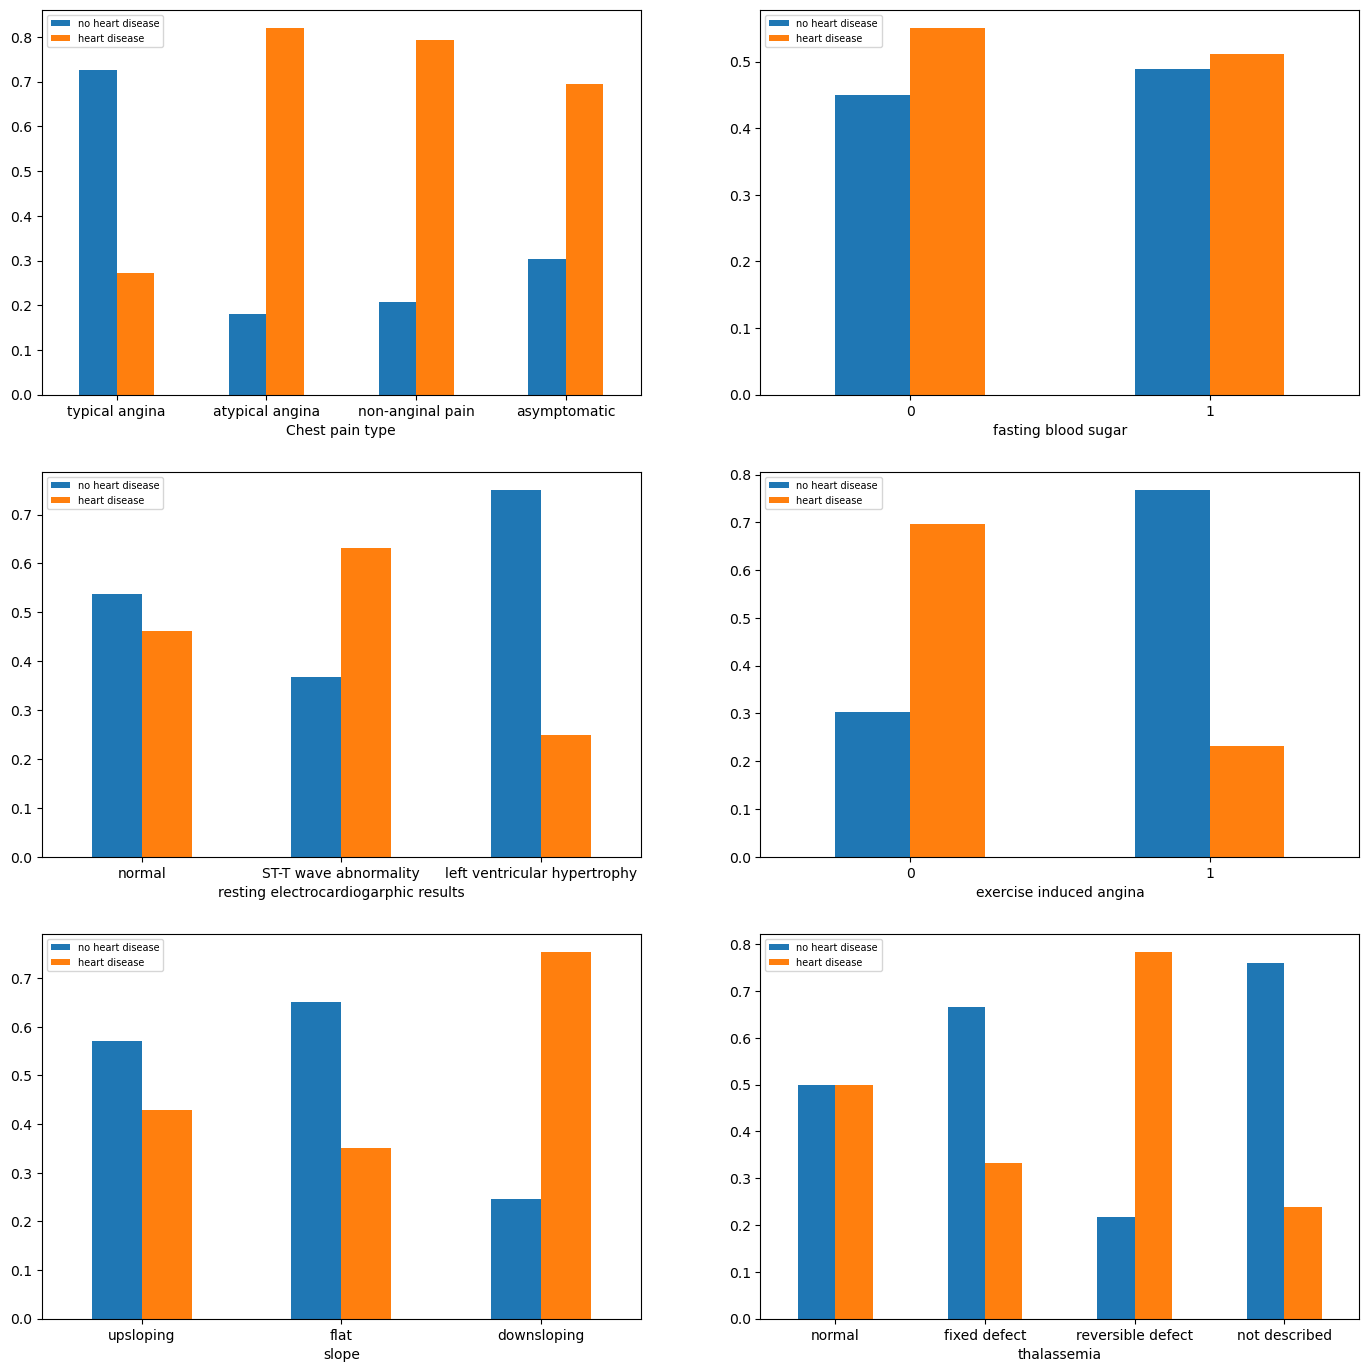

In [46]:
#Crosstab of categorical features and target variable

fig = plt.figure(figsize=(17,17))

x = [321, 322, 323, 324, 325, 326]
c = ['Chest pain type','fasting blood sugar','resting electrocardiogarphic results','exercise induced angina','slope','thalassemia'] 

for i in range(len(x)):
    ax = fig.add_subplot(x[i])
    pd.crosstab(heart_dis_data[c[i]], heart_dis_data['target'], normalize='index').plot(kind='bar', ax=ax)
    plt.legend(['no heart disease','heart disease'], loc='upper left', prop = {'size':7})
    plt.xticks(rotation='horizontal')

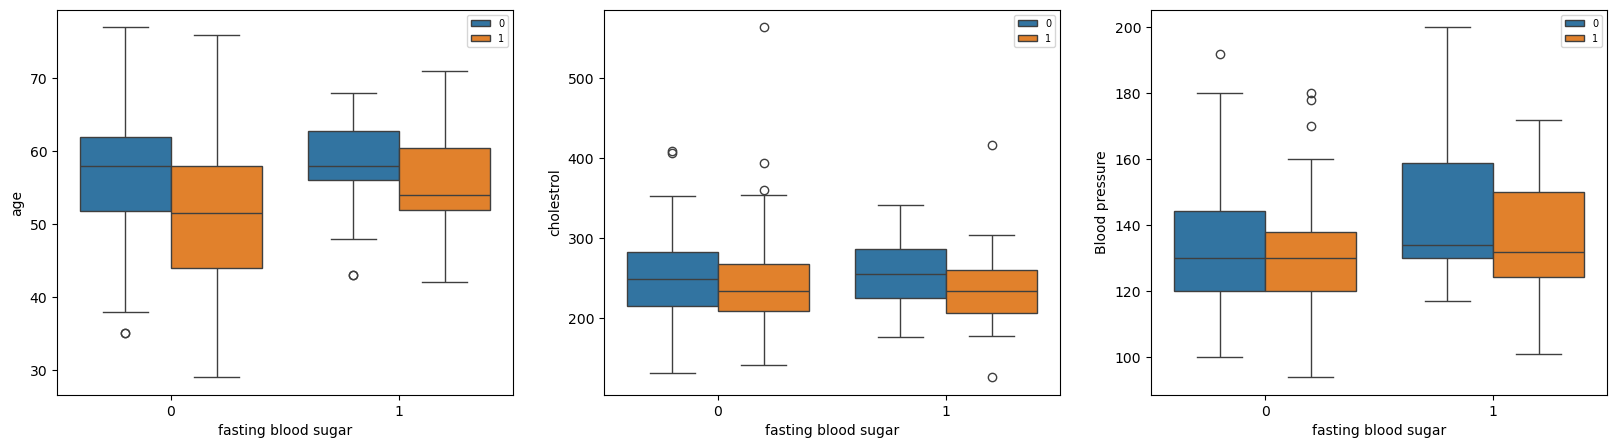

In [47]:
# Distribution of quantitative variables against blood sugar for each class of target variable

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
sns.boxplot(data = heart_dis_data,  x = heart_dis_data['fasting blood sugar'], y=heart_dis_data['age'], hue='target', ax=ax1)
plt.legend(loc='upper right', prop={'size':7})

ax2 = fig.add_subplot(132)
sns.boxplot(data = heart_dis_data,  x = heart_dis_data['fasting blood sugar'], y=heart_dis_data['cholestrol'], hue='target', ax=ax2)
plt.legend(loc='upper right', prop={'size':7})

ax3 = fig.add_subplot(133)
sns.boxplot(data = heart_dis_data,  x = heart_dis_data['fasting blood sugar'], y=heart_dis_data['Blood pressure'], hue='target', ax=ax3)
plt.legend(loc='upper right', prop={'size':7})

In [49]:
# Normalisation of quantitative features

In [50]:
scale = MinMaxScaler()
Age = scale.fit_transform(X=np.array(heart_data['age']).reshape(len(heart_data['age']),1))
Blood_pres = scale.fit_transform(X=np.array(heart_data['Blood pressure']).reshape(len(heart_data['Blood pressure']),1))
chol = scale.fit_transform(X=np.array(heart_data['cholestrol']).reshape(len(heart_data['cholestrol']),1))
max_heart = scale.fit_transform(X=np.array(heart_data['maximum heart rate achieved']).reshape(len(heart_data['maximum heart rate achieved']),1))
oldpeak = scale.fit_transform(X=np.array(heart_data['oldpeak']).reshape(len(heart_data['oldpeak']),1))
major_ves = scale.fit_transform(X=np.array(heart_data['number of major vessels coloured by fluoroscopy']).reshape(len(heart_data['number of major vessels coloured by fluoroscopy']),1))

In [52]:
heart_data['age'] = Age
heart_data['Blood pressure'] = Blood_pres
heart_data['cholestrol'] = chol
heart_data['maximum heart rate achieved'] = max_heart
heart_data['oldpeak'] = oldpeak
heart_data['number of major vessels coloured by fluoroscopy'] = major_ves

In [57]:
heart_num_data = heart_data[['age','Blood pressure','maximum heart rate achieved','oldpeak','cholestrol','number of major vessels coloured by fluoroscopy']]

<Axes: >

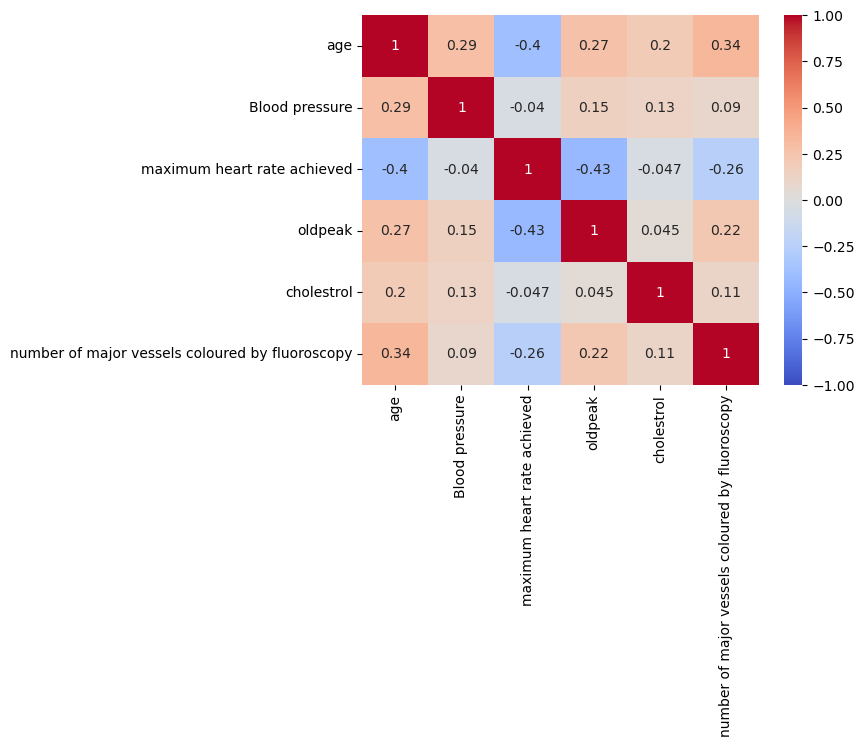

In [59]:
# Correlation matrix 

sns.heatmap(heart_num_data.corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: xlabel='slope,thalassemia,exercise induced angina'>

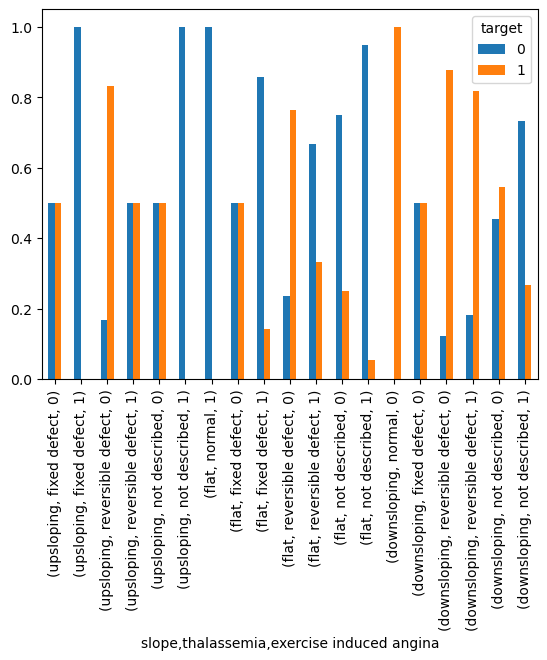

In [61]:
pd.crosstab(index = [heart_dis_data['slope'],heart_dis_data['thalassemia'], heart_dis_data['exercise induced angina']], columns = heart_dis_data['target'], normalize='index').plot(kind='bar')

In [63]:
# Final pre-processed data

heart_data.head()

,age,sex (male = 1),Blood pressure,cholestrol,blood sugar (high = 1),maximum heart rate achieved,exercise induced angina,oldpeak,number of major vessels coloured by fluoroscopy,target,...,ST-T wave abnormality,left ventricular hypertrophy,normal,downsloping,flat,upsloping,fixed defect,normal,not described,reversible defect
0,0.708333,1,0.481132,0.244292,1,0.603053,0,0.370968,0.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.166667,1,0.339623,0.283105,0,0.885496,0,0.564516,0.0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.250000,0,0.339623,0.178082,0,0.770992,0,0.225806,0.0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.562500,1,0.245283,0.251142,0,0.816794,0,0.129032,0.0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.583333,0,0.245283,0.520548,0,0.702290,1,0.096774,0.0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
# Selection of the most important features

selected_data = heart_data[['typical angina','reversible defect','number of major vessels coloured by fluoroscopy','oldpeak','maximum heart rate achieved','non-anginal pain','atypical angina',
'asymptomatic','left ventricular hypertrophy','exercise induced angina','downsloping','not described', 'flat','upsloping','fixed defect','ST-T wave abnormality']]

In [87]:
# changing data type of categorical features from float to category

data_col = selected_data.drop(['number of major vessels coloured by fluoroscopy','oldpeak','maximum heart rate achieved'], axis=1).columns

for col in data_col:
    selected_data.loc[:,col] = selected_data.loc[:,col].astype('int')

for col in data_col:
    selected_data.loc[:,col] = selected_data.loc[:,col].astype('category')

In [75]:
selected_data.dtypes

typical angina                                     category
reversible defect                                  category
number of major vessels coloured by fluoroscopy     float64
oldpeak                                             float64
maximum heart rate achieved                         float64
non-anginal pain                                   category
atypical angina                                    category
asymptomatic                                       category
left ventricular hypertrophy                       category
exercise induced angina                            category
downsloping                                        category
not described                                      category
flat                                               category
upsloping                                          category
fixed defect                                       category
ST-T wave abnormality                              category
dtype: object

In [77]:
# Model development
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(selected_data, heart_data['target'], test_size=0.3, stratify=heart_data['target'], random_state=32)

In [79]:
# Logistic regression

In [81]:
# Hyper parameter tuning 

param = {'C':[0.001,0.01,0.1,10,100], 'l1_ratio':[0.1,0.3,0.5,0.9], 'max_iter':[50,100,200], 'class_weight':['balanced',None]}
logr = LogisticRegression(penalty='elasticnet',verbose=1, solver='saga')
gd_lreg = GridSearchCV(estimator=logr, param_grid=param, verbose=1, cv=3, scoring='f1', n_jobs=4)

In [99]:
gd_lreg.fit(x_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
max_iter reached after 0 seconds


GridSearchCV(cv=3,
             estimator=LogisticRegression(penalty='elasticnet', solver='saga',
                                          verbose=1),
             n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100],
                         'class_weight': ['balanced', None],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.9],
                         'max_iter': [50, 100, 200]},
             scoring='f1', verbose=1)

In [101]:
gd_lreg.best_params_

{'C': 10, 'class_weight': None, 'l1_ratio': 0.9, 'max_iter': 50}

In [103]:
logreg = LogisticRegression(C=10, penalty='elasticnet',verbose=1, solver='saga', l1_ratio=0.9, max_iter=50, class_weight=None, random_state=32)
logreg.fit(x_train,y_train)

max_iter reached after 0 seconds


LogisticRegression(C=10, l1_ratio=0.9, max_iter=50, penalty='elasticnet',
                   random_state=32, solver='saga', verbose=1)

In [105]:
x_train_pred = logreg.predict(x_train)
x_test_pred = logreg.predict(x_test)

In [97]:
print('classification report of train data is')
print(classification_report(y_train, x_train_pred))
print('classification report of test data is')
print(classification_report(y_test, x_test_pred))

classification report of train data is
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        97
           1       0.84      0.90      0.87       115

    accuracy                           0.85       212
   macro avg       0.85      0.84      0.85       212
weighted avg       0.85      0.85      0.85       212

classification report of test data is
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [99]:
print(accuracy_score(y_train, x_train_pred))
print(accuracy_score(y_test, x_test_pred))

0.8490566037735849
0.8461538461538461


In [101]:
fprate_tr_log, tprate_tr_log, thresholds = roc_curve(y_train, x_train_pred)
roc_auc_train_log = auc(fprate_tr_log, tprate_tr_log)

fprate_test_log, tprate_test_log, thresholds = roc_curve(y_test, x_test_pred)
roc_auc_test_log = auc(fprate_test_log, tprate_test_log)

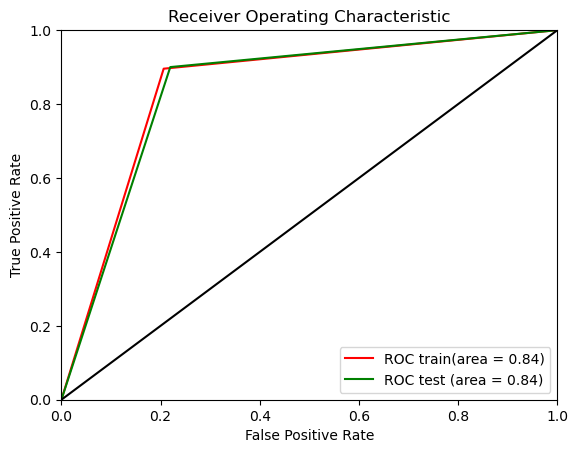

In [103]:
plt.figure()

plt.plot(fprate_tr_log, tprate_tr_log, color='red', label='ROC train(area = %0.2f)' % roc_auc_train_log)
plt.plot(fprate_test_log, tprate_test_log, color='green', label='ROC test (area = %0.2f)' % roc_auc_test_log)

plt.plot([0, 1], [0, 1], color='black')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

plt.legend(loc='lower right')

In [105]:
# Model deployment (Logistic Regression model was finally selected for model deployment; model stored as pickle file)

#filename = 'C:/Users/61450/Desktop/refonte folder/heart disease prediction/model.pkl'
#pickle.dump(logreg, open(filename, 'wb'))

In [235]:
#Decision tree classifier

In [105]:
dec_tree = DecisionTreeClassifier(random_state=40)
params = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':[2,4,6,8,10], 'min_samples_split':[2,4,5,6,7], 'max_features':[10,15,20,23], 'class_weight':['balanced',None]}
gd_dec = GridSearchCV(estimator=dec_tree, param_grid=params, verbose=1, cv=3, scoring='f1', n_jobs=4)

In [107]:
gd_dec.fit(x_train,y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=40), n_jobs=4,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [10, 15, 20, 23],
                         'min_samples_split': [2, 4, 5, 6, 7]},
             scoring='f1', verbose=1)

In [109]:
gd_dec.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 10,
 'min_samples_split': 2}

In [111]:
dectree = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=10, min_samples_split=2, class_weight='balanced', random_state=32)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features=10, random_state=32)

In [113]:
x_train_pred = dectree.predict(x_train)
x_test_pred = dectree.predict(x_test)

In [115]:
print('classification report of train data is')
print(classification_report(y_train, x_train_pred))
print('classification report of test data is')
print(classification_report(y_test, x_test_pred))

classification report of train data is
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        97
           1       0.85      0.92      0.89       115

    accuracy                           0.87       212
   macro avg       0.88      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212

classification report of test data is
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



In [117]:
print(accuracy_score(y_train, x_train_pred))
print(accuracy_score(y_test, x_test_pred))

0.8726415094339622
0.7692307692307693


In [119]:
fprate_tr_dec, tprate_tr_dec, thresholds = roc_curve(y_train, x_train_pred)
roc_auc_train_dec = auc(fprate_tr_dec, tprate_tr_dec)

fprate_test_dec, tprate_test_dec, thresholds = roc_curve(y_test, x_test_pred)
roc_auc_test_dec = auc(fprate_test_dec, tprate_test_dec)

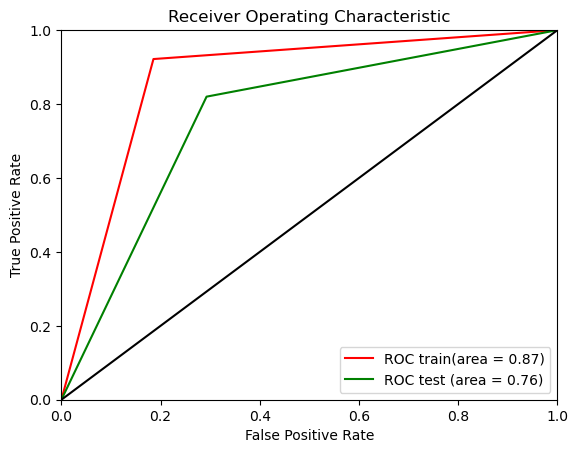

In [121]:
plt.figure()

plt.plot(fprate_tr_dec, tprate_tr_dec, color='red', label='ROC train(area = %0.2f)' % roc_auc_train_dec)
plt.plot(fprate_test_dec, tprate_test_dec, color='green', label='ROC test (area = %0.2f)' % roc_auc_test_dec)

plt.plot([0, 1], [0, 1], color='black')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

plt.legend(loc='lower right')

In [137]:
#Random forest classifier

In [123]:
ran_for = RandomForestClassifier(verbose=1, random_state=32)
params = {'n_estimators':[50,100,200], 'criterion':['gini','entropy','log_loss'], 'max_depth':[2,3,4,5,6,8], 'min_samples_split':[2,3,5,6,7], 'max_features':[8,10,15,23], 'class_weight':['balanced','balanced_subsample']} 
gd_ran = GridSearchCV(estimator=ran_for, param_grid=params, n_jobs=4, scoring='f1', cv=3, verbose=1)

In [125]:
gd_ran.fit(x_train,y_train)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=32, verbose=1),
             n_jobs=4,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': [8, 10, 15, 23],
                         'min_samples_split': [2, 3, 5, 6, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [127]:
gd_ran.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 23,
 'min_samples_split': 2,
 'n_estimators': 50}

In [129]:
ranfor = RandomForestClassifier(criterion='entropy', max_depth=2, max_features=23, min_samples_split=2, n_estimators=50, class_weight='balanced_subsample', verbose=1, random_state=32)
ranfor.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=2, max_features=23, n_estimators=50,
                       random_state=32, verbose=1)

In [131]:
x_train_pred = ranfor.predict(x_train)
x_test_pred = ranfor.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [133]:
print('classification report of train data is')
print(classification_report(y_train, x_train_pred))
print('classification report of test data is')
print(classification_report(y_test, x_test_pred))

classification report of train data is
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        97
           1       0.86      0.90      0.88       115

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.87       212
weighted avg       0.87      0.87      0.87       212

classification report of test data is
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.82      0.90      0.86        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [135]:
print(accuracy_score(y_train, x_train_pred))
print(accuracy_score(y_test, x_test_pred))

0.8679245283018868
0.8351648351648352


In [137]:
fprate_tr_ran, tprate_tr_ran, thresholds = roc_curve(y_train, x_train_pred)
roc_auc_train_ran = auc(fprate_tr_ran, tprate_tr_ran)

fprate_test_ran, tprate_test_ran, thresholds = roc_curve(y_test, x_test_pred)
roc_auc_test_ran = auc(fprate_test_ran, tprate_test_ran)

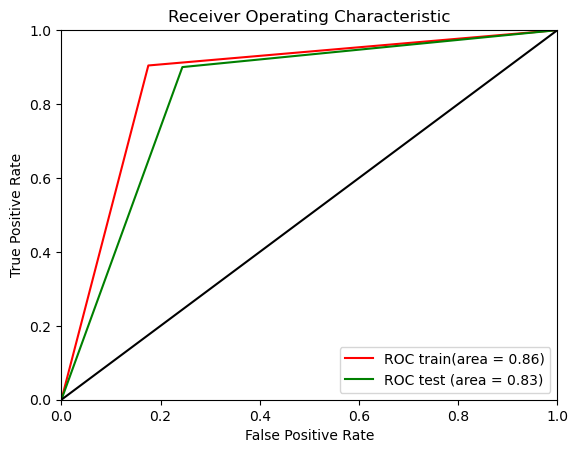

In [139]:
plt.figure()

plt.plot(fprate_tr_ran, tprate_tr_ran, color='red', label='ROC train(area = %0.2f)' % roc_auc_train_ran)
plt.plot(fprate_test_ran, tprate_test_ran, color='green', label='ROC test (area = %0.2f)' % roc_auc_test_ran)

plt.plot([0, 1], [0, 1], color='black')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

plt.legend(loc='lower right')

In [157]:
#Support vector Machines

In [141]:
svc = SVC(random_state=32)
params = {'C':[0.001,0.1,1,10,100], 'kernel':['linear','rbf','poly','sigmoid'],'gamma':[0.001,0.1,1,10,100], 'class_weight':['balanced',None]}
svc_gd = GridSearchCV(estimator=svc, param_grid=params, n_jobs=4, scoring='f1', cv=3, verbose=1)

In [143]:
svc_gd.fit(x_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=SVC(random_state=32), n_jobs=4,
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'gamma': [0.001, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1', verbose=1)

In [145]:
svc_gd.best_params_

{'C': 10, 'class_weight': None, 'gamma': 0.1, 'kernel': 'poly'}

In [147]:
svcb = SVC(C=10, class_weight=None, gamma=0.1, kernel='poly', verbose=1)
svcb.fit(x_train,y_train)

[LibSVM]

SVC(C=10, gamma=0.1, kernel='poly', verbose=1)

In [149]:
x_train_pred = svcb.predict(x_train)
x_test_pred = svcb.predict(x_test)

In [151]:
print('classification report of train data is')
print(classification_report(y_train, x_train_pred))
print('classification report of test data is')
print(classification_report(y_test, x_test_pred))

classification report of train data is
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        97
           1       0.88      0.91      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212

classification report of test data is
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        41
           1       0.79      0.90      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.80      0.81        91
weighted avg       0.82      0.81      0.81        91



In [153]:
print(accuracy_score(y_train, x_train_pred))
print(accuracy_score(y_test, x_test_pred))

0.8820754716981132
0.8131868131868132


In [155]:
# Plotting roc auc curve

fprate_tr_svc, tprate_tr_svc, thresholds = roc_curve(y_train, x_train_pred)
roc_auc_train_svc = auc(fprate_tr_svc, tprate_tr_svc)

fprate_test_svc, tprate_test_svc, thresholds = roc_curve(y_test, x_test_pred)
roc_auc_test_svc = auc(fprate_test_svc, tprate_test_svc)

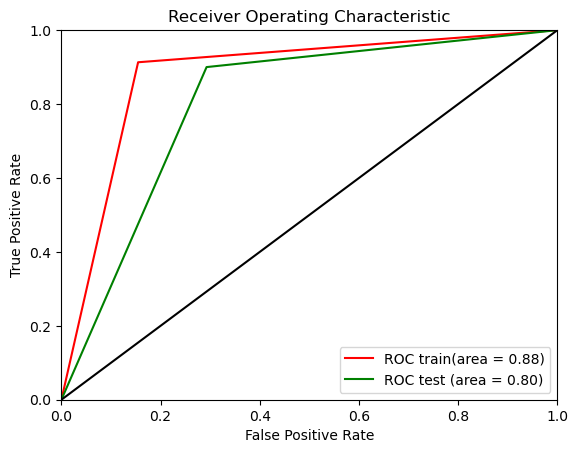

In [157]:
plt.figure()

plt.plot(fprate_tr_svc, tprate_tr_svc, color='red', label='ROC train(area = %0.2f)' % roc_auc_train_svc)
plt.plot(fprate_test_svc, tprate_test_svc, color='green', label='ROC test (area = %0.2f)' % roc_auc_test_svc)

plt.plot([0, 1], [0, 1], color='black')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

plt.legend(loc='lower right')

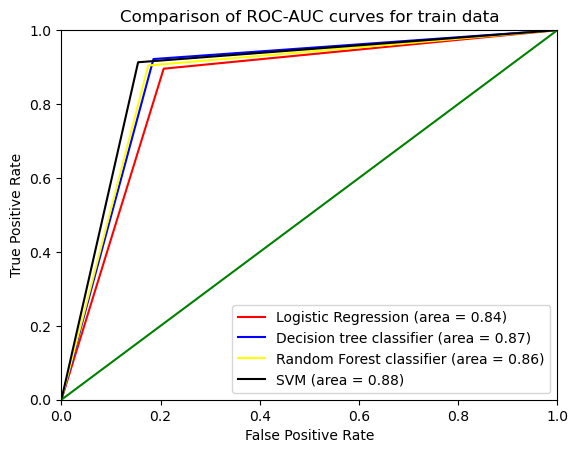

In [159]:
# Model comparison (train data)

plt.figure()

plt.plot(fprate_tr_log, tprate_tr_log, color='red', label='Logistic Regression (area = %0.2f)' % roc_auc_train_log)
plt.plot(fprate_tr_dec, tprate_tr_dec, color='blue', label='Decision tree classifier (area = %0.2f)' % roc_auc_train_dec)
plt.plot(fprate_tr_ran, tprate_tr_ran, color='yellow', label='Random Forest classifier (area = %0.2f)' % roc_auc_train_ran)
plt.plot(fprate_tr_svc, tprate_tr_svc, color='black', label='SVM (area = %0.2f)' % roc_auc_train_svc)

plt.plot([0, 1], [0, 1], color='green')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC-AUC curves for train data')

plt.legend(loc='lower right')


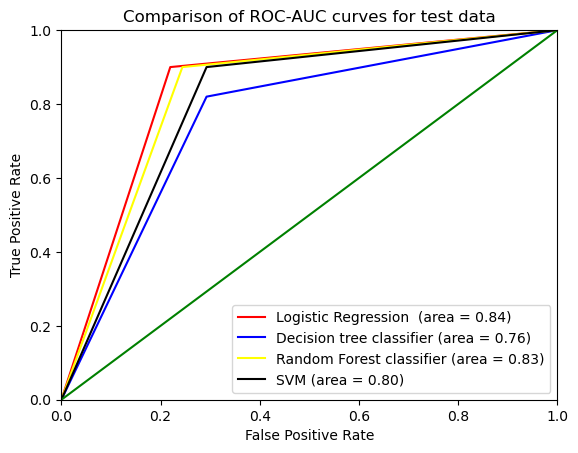

In [161]:
# Model comparison (test data)

plt.figure()


plt.plot(fprate_test_log, tprate_test_log, color='red', label='Logistic Regression  (area = %0.2f)' % roc_auc_test_log)
plt.plot(fprate_test_dec, tprate_test_dec, color='blue', label='Decision tree classifier (area = %0.2f)' % roc_auc_test_dec)
plt.plot(fprate_test_ran, tprate_test_ran, color='yellow', label='Random Forest classifier (area = %0.2f)' % roc_auc_test_ran)
plt.plot(fprate_test_svc, tprate_test_svc, color='black', label='SVM (area = %0.2f)' % roc_auc_test_svc)

plt.plot([0, 1], [0, 1], color='green')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC-AUC curves for test data')

plt.legend(loc='lower right')

In [163]:
# XG BOOST classifier

xgbclas = XGBClassifier(objective='binary:logistic', tree_method='auto', eval_metric='auc', enable_categorical=True)

param = {'max_depth' : [1,3,4,5], 'subsample':[0.1,0.4,0.7,1], 'colsample_bytree':[0.4,0.6,0.7,1], 'learning_rate':[0.01,0.1,0.3,0.6],'n_estimators':[50,100,200]}
grid_cv = GridSearchCV(estimator=xgbclas, param_grid=param, n_jobs=4, scoring='f1', verbose=1, cv=3)


In [165]:
grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric='auc',
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.3, 0.6],
                         'max_depth': [1, 3, 4, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.1, 0.4, 0.7, 1]},
             scoring='f1', verbose=1)

In [167]:
grid_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.1}

In [169]:
xgb_cl = XGBClassifier(objective='binary:logistic', tree_method='auto', eval_metric='auc', enable_categorical=True, colsample_bytree=0.7, 
                       learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.1)

xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [171]:
x_train_pred = xgb_cl.predict(x_train)
x_test_pred = xgb_cl.predict(x_test)

In [173]:
print('classification report of train data is')
print(classification_report(y_train, x_train_pred))
print('classification report of test data is')
print(classification_report(y_test, x_test_pred))

classification report of train data is
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        97
           1       0.82      0.94      0.88       115

    accuracy                           0.86       212
   macro avg       0.87      0.85      0.85       212
weighted avg       0.87      0.86      0.86       212

classification report of test data is
              precision    recall  f1-score   support

           0       0.87      0.66      0.75        41
           1       0.77      0.92      0.84        50

    accuracy                           0.80        91
   macro avg       0.82      0.79      0.79        91
weighted avg       0.81      0.80      0.80        91



In [175]:
print(accuracy_score(y_train, x_train_pred))
print(accuracy_score(y_test, x_test_pred))

0.8584905660377359
0.8021978021978022


In [177]:
# plotting roc auc curve

fprate_tr_xgb, tprate_tr_xgb, thresholds = roc_curve(y_train, x_train_pred)
roc_auc_train_xgb = auc(fprate_tr_xgb, tprate_tr_xgb)

fprate_test_xgb, tprate_test_xgb, thresholds = roc_curve(y_test, x_test_pred)
roc_auc_test_xgb = auc(fprate_test_xgb, tprate_test_xgb)

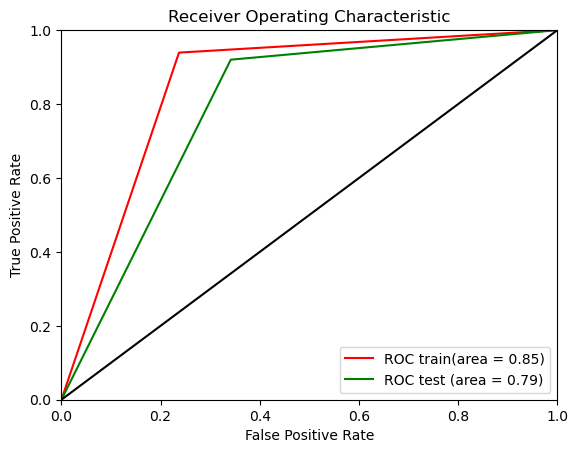

In [179]:
plt.figure()

plt.plot(fprate_tr_xgb, tprate_tr_xgb, color='red', label='ROC train(area = %0.2f)' % roc_auc_train_xgb)
plt.plot(fprate_test_xgb, tprate_test_xgb, color='green', label='ROC test (area = %0.2f)' % roc_auc_test_xgb)

plt.plot([0, 1], [0, 1], color='black')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

plt.legend(loc='lower right')

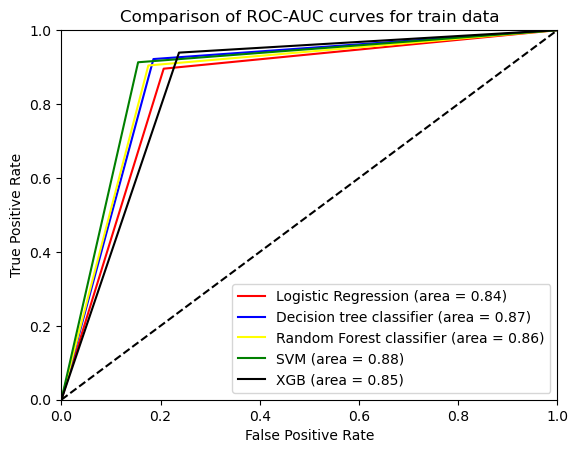

In [181]:
# Model comparison (train data) including XG Boost classifier

plt.figure()


plt.plot(fprate_tr_log, tprate_tr_log, color='red', label='Logistic Regression (area = %0.2f)' % roc_auc_train_log)
plt.plot(fprate_tr_dec, tprate_tr_dec, color='blue', label='Decision tree classifier (area = %0.2f)' % roc_auc_train_dec)
plt.plot(fprate_tr_ran, tprate_tr_ran, color='yellow', label='Random Forest classifier (area = %0.2f)' % roc_auc_train_ran)
plt.plot(fprate_tr_svc, tprate_tr_svc, color='green', label='SVM (area = %0.2f)' % roc_auc_train_svc)
plt.plot(fprate_tr_xgb, tprate_tr_xgb, color='black', label='XGB (area = %0.2f)' % roc_auc_train_xgb)

plt.plot([0, 1], [0, 1], color='black', ls='dashed')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC-AUC curves for train data')

plt.legend(loc='lower right')


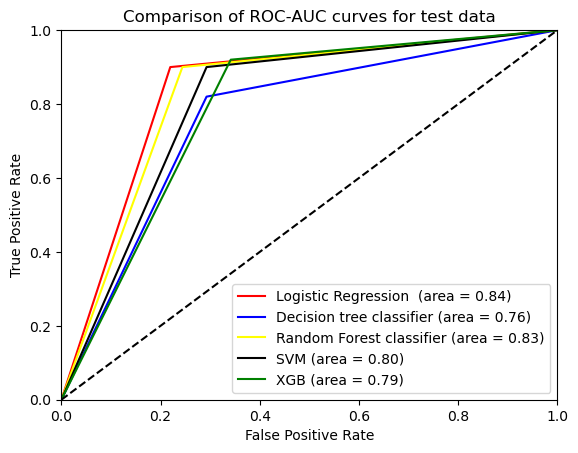

In [183]:
# Model comparison (test data) including XG Boost classifier

plt.figure()


plt.plot(fprate_test_log, tprate_test_log, color='red', label='Logistic Regression  (area = %0.2f)' % roc_auc_test_log)
plt.plot(fprate_test_dec, tprate_test_dec, color='blue', label='Decision tree classifier (area = %0.2f)' % roc_auc_test_dec)
plt.plot(fprate_test_ran, tprate_test_ran, color='yellow', label='Random Forest classifier (area = %0.2f)' % roc_auc_test_ran)
plt.plot(fprate_test_svc, tprate_test_svc, color='black', label='SVM (area = %0.2f)' % roc_auc_test_svc)
plt.plot(fprate_test_xgb, tprate_test_xgb, color='green', label='XGB (area = %0.2f)' % roc_auc_test_xgb)


plt.plot([0, 1], [0, 1], color='black', ls='dashed')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC-AUC curves for test data')

plt.legend(loc='lower right')